In [31]:
from math import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

## Fast Exponential Function Approximation

See [A Fast,Compact Approximatio   n of  th e Exponentia l Function](https://nic.schraudolph.org/pubs/Schraudolph99.pdf) for more information.

In [32]:
def fast_exp64(x):
    # i = ay + (b - c)
    # a = 2**20/ln(2) = 1512775
    # b = 1023 * 2**20 = 1072693248
    # c = (ln(ln(2)+2÷e)−ln(2)−ln(ln(2)))×2^20÷ln(2) = 60801
    # i = 1512775y + (1072693248 - 60801) = 1512775y + 1072632447
    tmp = np.zeros((1), np.int64)
    tmp[0] = 1512775 * x + 1072632447
    tmp[0] = tmp[0] << 32
    return tmp.view(np.float64)[0]

In [33]:
def fast_exp32(x):
    # i = ay + (b - c)
    # a = 2**23/ln(2) = 12102203
    # b = 127 * 2**23 = 1065353216
    # c = (ln(ln(2)+2÷e)−ln(2)−ln(ln(2)))×2^23÷ln(2) = 366393 (according to the paper)
    # i = 12102203y + (1065353216 - 366392) = 12102203y + 1064986824
    tmp = np.zeros((1), np.int32)
    tmp[0] = 12102203 * x + 1064986824
    return tmp.view(np.float32)[0]

<IPython.core.display.Javascript object>


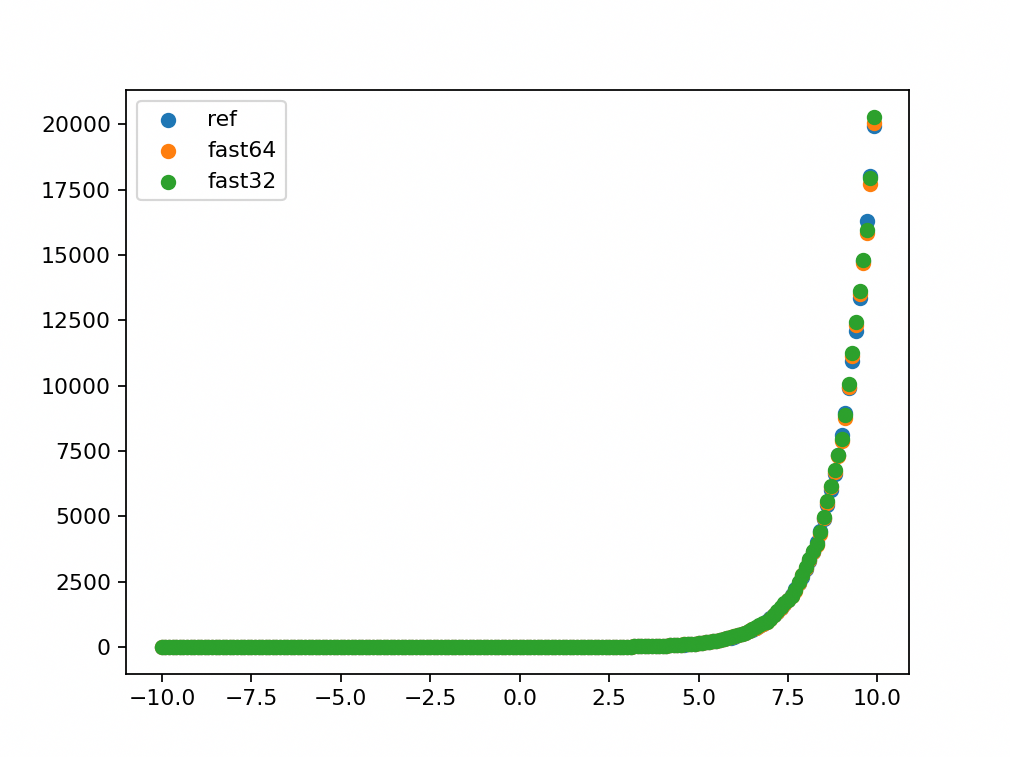

In [35]:
r = np.arange(-10, 10, 0.1)

plt.figure()
plt.scatter(r, np.exp(r), label="ref")
plt.scatter(r, [fast_exp64(i) for i in r], label="fast64")
plt.scatter(r, [fast_exp32(i) for i in r], label="fast32")
plt.legend()
plt.show()